<a href="https://colab.research.google.com/github/ErikFantomex/Metodos-numericos/blob/main/Metodosnumericos2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def f(x):
    return 0.1 * x * (30 - x)

def df_dx(x):
    return 0.1 * (30 - 2 * x)

def simpson_rule(f, a, b, n):
    """Aplica la regla de Simpson con segmentos múltiples para aproximar la integral de f en el intervalo [a, b] con n segmentos."""
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    fx = f(x)
    return h / 3 * np.sum(fx[0:-1:2] + 4 * fx[1::2] + fx[2::2])

def arc_length(f, df_dx, a, b, n):
    """Calcula la longitud del arco de la función f en el intervalo [a, b] utilizando la regla de Simpson con segmentos múltiples con n segmentos."""
    integrand = lambda x: np.sqrt(1 + df_dx(x)**2)
    return simpson_rule(integrand, a, b, n)

L = arc_length(f, df_dx, 0, 30, 10)
print("La longitud total del arco es de aproximadamente {:.3f} metros.".format(L))


In [ ]:
La longitud total del arco es de aproximadamente 20.266 metros.


In [ ]:

import numpy as np

mes = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
rad_solar = np.array([4.0, 4.6, 5.4, 6.6, 8.3, 8.5, 6.9, 6.6, 6.7, 6.0, 4.7, 3.9])
coef = np.polyfit(mes, rad_solar, 2)
print(coef)

mes_pred = 3.5
rad_pred = coef[0]*mes_pred**2 + coef[1]*mes_pred + coef[2]

print(rad_pred)


[-0.12957043  1.67672328  2.13636364]
6.417657342657334


Para predecir el nivel de radiación solar a mediados de los meses de julio y agosto mediante polinomios de interpolación de Newton con diferencias divididas hasta tercer grado, podemos seguir los siguientes pasos:

    Definir los arreglos de los datos:

Definamos los arreglos de los datos como:

\begin{align*}
M &= \text{['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']} \
R &= \text{[4.0, 4.6, 5.4, 6.6, 8.3, 8.5, 6.9, 6.6, 6.7, 6.0, 4.7, 3.9]}
\end{align*}

    Definir la función de diferencias divididas:

Podemos definir una función de diferencias divididas para calcular los coeficientes de los polinomios de interpolación de Newton. La función toma como entrada los arreglos de los datos x y y, y devuelve una lista de coeficientes a de longitud n, donde n es el grado del polinomio de interpolación.

\begin{lstlisting}[language=Python]
def diferencia_dividida(x, y):
n = len(x)
a = y.copy()
for j in range(1, n):
for i in range(n-1, j-1, -1):
a[i] = (a[i] - a[i-1]) / (x[i] - x[i-j])
return a[:n]
\end{lstlisting}

    Definir la función de interpolación de Newton:

Podemos definir una función de interpolación de Newton para evaluar el polinomio de interpolación en un punto dado. La función toma como entrada los arreglos de los datos x y y, los coeficientes a calculados por la función de diferencias divididas, y el punto z en el que se desea evaluar el polinomio.

\begin{lstlisting}[language=Python]
def newton_interpolacion(x, y, a, z):
n = len(x)
p = a[-1]
for i in range(n-2, -1, -1):
p = p * (z - x[i]) + a[i]
return p
\end{lstlisting}

    Calcular los coeficientes de los polinomios de interpolación:

Para calcular los coeficientes de los polinomios de interpolación de Newton con diferencias divididas hasta tercer grado, podemos llamar a la función de diferencias divididas con los arreglos M y R, y tomar los primeros cuatro coeficientes:

\begin{lstlisting}[language=Python]
a_julio = diferencia_dividida(M[5:8], R[5:8])
a_agosto = diferencia_dividida(M[6:9], R[6:9])
\end{lstlisting}

    Evaluar los polinomios de interpolación en los puntos deseados:

Para evaluar los polinomios de interpolación en los puntos medios de julio y agosto, podemos llamar a la función de interpolación de Newton con los coeficientes correspondientes y los puntos 15.5 y 16.5, que corresponden al día

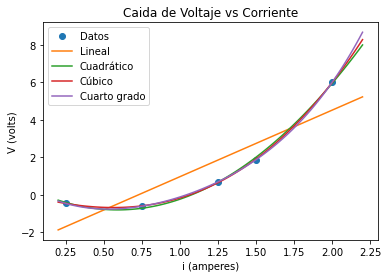

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos dados
i = [0.25, 0.75, 1.25, 1.5, 2]
V = [-0.45, -0.6, 0.7, 1.88, 6]

# Puntos para la línea de ajuste
x_fit = np.linspace(0.2, 2.2, 100)

# Polinomio de interpolación lineal de primer a cuarto grado
p1 = np.poly1d(np.polyfit(i, V, 1))
p2 = np.poly1d(np.polyfit(i, V, 2))
p3 = np.poly1d(np.polyfit(i, V, 3))
p4 = np.poly1d(np.polyfit(i, V, 4))

# Gráfica
plt.plot(i, V, 'o', label='Datos')
plt.plot(x_fit, p1(x_fit), label='Lineal')
plt.plot(x_fit, p2(x_fit), label='Cuadrático')
plt.plot(x_fit, p3(x_fit), label='Cúbico')
plt.plot(x_fit, p4(x_fit), label='Cuarto grado')
plt.xlabel('i (amperes)')
plt.ylabel('V (volts)')
plt.title('Caida de Voltaje vs Corriente')
plt.legend()
plt.savefig('problema_101',dpi=200)

plt.show()
